# 2020.11.24
# 인공지능 강의 12일차

여기 사이트 학습하기
https://wikidocs.net/book/3682

=================================================================================================================

### 회귀 분석의 유형
 - 단순 선형 회귀
 - 중 선형 회귀
 - 비 선형 회귀
 
### 회귀식의 구조
 - 회귀선은 각 점에서 직선거리의 수직거리(오차)의 자승 값을 최소화 시키는 선으로 error의 변동 합을 최소화 시킨다. - 최소자승법(least square regression)
 - 오차(e)는 회귀선과 관찰된 점의 수직 거리이다.
 - 회귀선의 예측력은 오차(error)에 의존되며, R의 제곱값으로 나타낸다.
 
 * Fitting 한다는 것은 최소 제곱볍에 의해 오차의 제곱합을 최소화하는 직선을 선택하는 것이다.
 * epoch : 전체 데이터 셋에 대해 한 번 학습을 완료한 상태이다.
 
### 단순회귀분석
 - 식 부분 확인하기!!

========================================================================================================

#### crim
 - per capita crime rate by town.
 - 마을 별 1 인당 범죄율.

#### zn
 - proportion of residential land zoned for lots over 25,000 sq.ft.
 - 25,000 평방 피트 이상의 부지에 구역화 된 주거용 토지의 비율.

#### indus
 - proportion of non-retail business acres per town.
 - 도시 당 비 소매 사업 에이커의 비율.

#### chas
 - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
 - Charles River 더미 변수 (지역이 강 경계면 = 1, 그렇지 않으면 0).

#### nox
 - nitrogen oxides concentration (parts per 10 million).
 - 질소 산화물 농도 (1000 만분 율).

#### rm
 - average number of rooms per dwelling. 
 - 주거 당 평균 방 수.

#### age
 - proportion of owner-occupied units built prior to 1940.
 - 1940 년 이전에 지어진 소유주가 소유 한 주택의 비율.

#### dis
 - weighted mean of distances to five Boston employment centres.
 - 5 개의 보스턴 고용 센터까지의 가중 평균 거리.

#### rad
 - index of accessibility to radial highways.
 - 방사형 고속도로에 대한 접근성 지수.

#### tax
 - full-value property-tax rate per/$10,000.
 - 1/$ 10,000 당 전체 가치 재산 세율.

#### ptratio
 - pupil-teacher ratio by town.
 - 도시 별 학생-교사 비율.

#### black
 - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
 - 1000 (Bk-0.63) ^ 2 여기서 Bk는 도시 별 흑인 비율입니다.

#### lstat
 - lower status of the population (percent).
 - 인구의 낮은 지위 (퍼센트).

#### medv
 - median value of owner-occupied homes in \$1000s.
 - 소유주가 거주하는 주택의 중앙값은 1,000 달러입니다.

========================================================================================================

In [169]:
import warnings
warnings.filterwarnings(action='ignore')

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [171]:
# Importing DataSet and take a look at Data
dataset = pd.read_csv("Boston_housing.csv")

In [172]:
# 데이터 앞 부분 보기
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [173]:
# 데이터 뒷 부분 보기
dataset.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [174]:
# 빈 데이터 수를 알 수 있다.
dataset.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [175]:
# 비어 있는 데이터는 버린다,
data = dataset.dropna()
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [176]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  MEDV     394 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 46.2 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


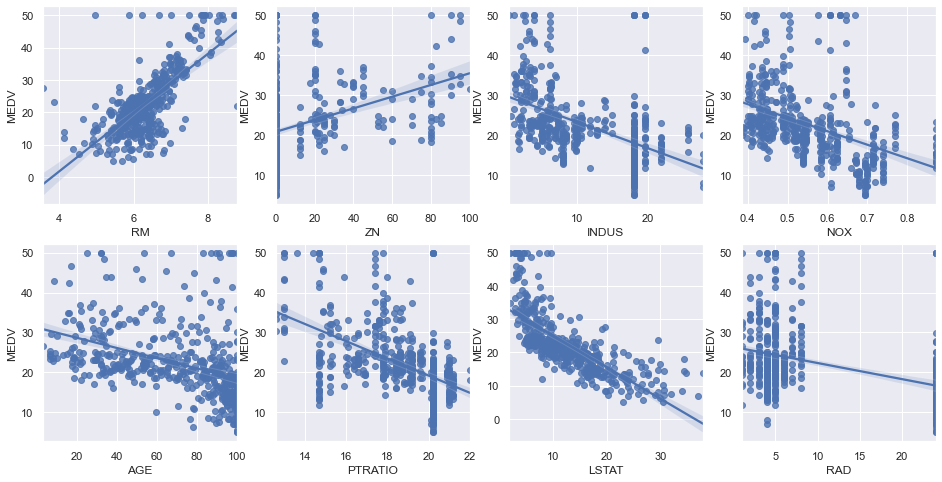

In [205]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='MEDV', data=dataset, ax=axs[row][col])

<AxesSubplot:>

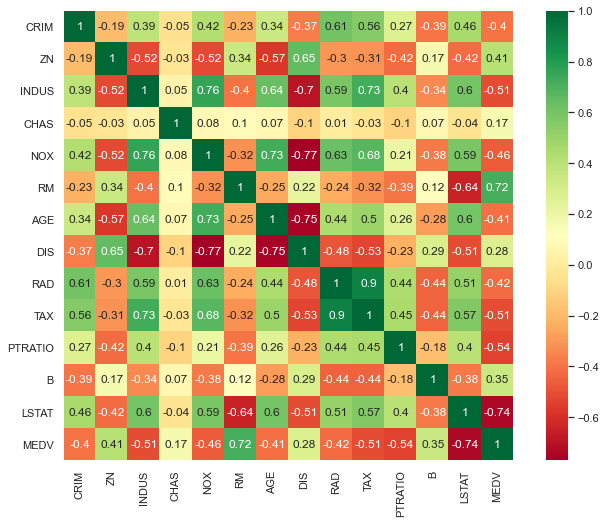

In [178]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.heatmap(data.corr().round(2), square=True, cmap='RdYlGn', annot=True)

In [179]:
x = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = data['MEDV']

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [181]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=10)

In [182]:
model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(predictions)

Text(0, 0.5, 'Predicted Y')

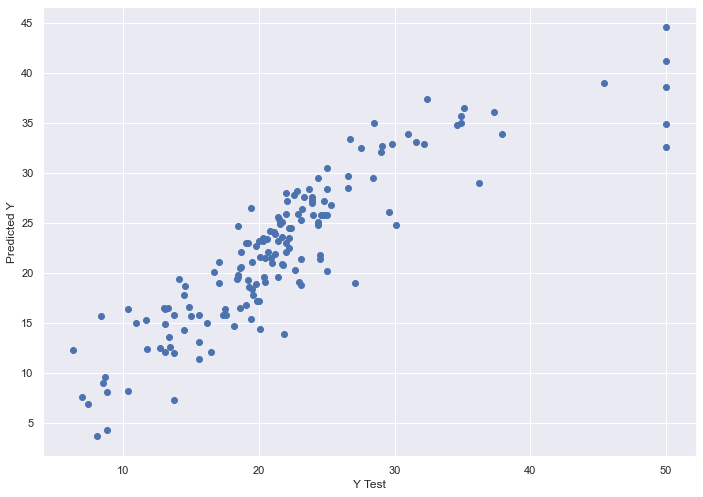

In [183]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [184]:
from sklearn import metrics

print('MAE :', metrics.mean_absolute_error(y_test, predictions))
print('MSE :', metrics.mean_squared_error(y_test, predictions))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE : 3.032162909929041
MSE : 15.652082884748348
RMSE : 3.956271336087598


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

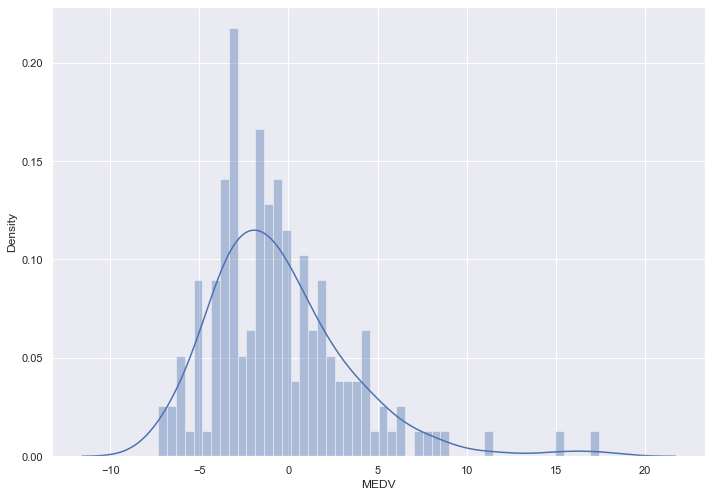

In [185]:
sns.distplot((y_test - predictions), bins=50)

========================================================================================================

### RAD 삭제 후 결과 보기 : 0.9가 존재하는 항목이다. TAX와 아주가깝지만 TAX 보다는 MEDV와 가깝지 않아서 삭제

In [225]:
x1 = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y1 = data['MEDV']
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.4, random_state=10)
model1 = LinearRegression()
model1.fit(x_train1, y_train1)
predictions1 = model1.predict(x_test1)

Text(0, 0.5, 'Predicted Y')

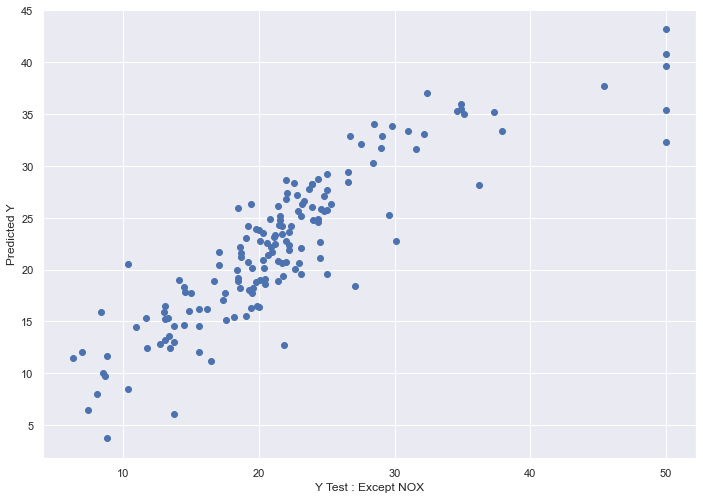

In [226]:
plt.scatter(y_test1, predictions1)
plt.xlabel('Y Test : Except NOX')
plt.ylabel('Predicted Y')

In [227]:
print('MAE :', metrics.mean_absolute_error(y_test1, predictions1))
print('MSE :', metrics.mean_squared_error(y_test1, predictions1))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test1, predictions1)))

MAE : 3.0341408161768744
MSE : 16.479915118150583
RMSE : 4.059546171451999


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

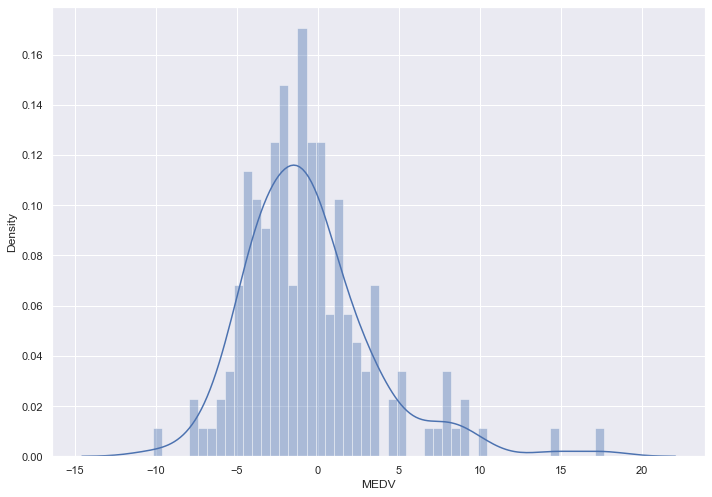

In [228]:
sns.distplot((y_test1-predictions1), bins=50)

========================================================================================================

### RAD과 DIS 삭제 후 결과 보기
### AGE, NOX, INDUS 가 DIS와 abs(0.7)정도 관계를 가진다. 하지만 DIS의 경우가 MEDV와 상관관계가 적어서 삭제

In [243]:
x2 = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y2 = data['MEDV']

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.4, random_state=10)

model2 = LinearRegression()
model2.fit(x_train2, y_train2)
predictions2 = model2.predict(x_test2)

Text(0, 0.5, 'Predicted Y')

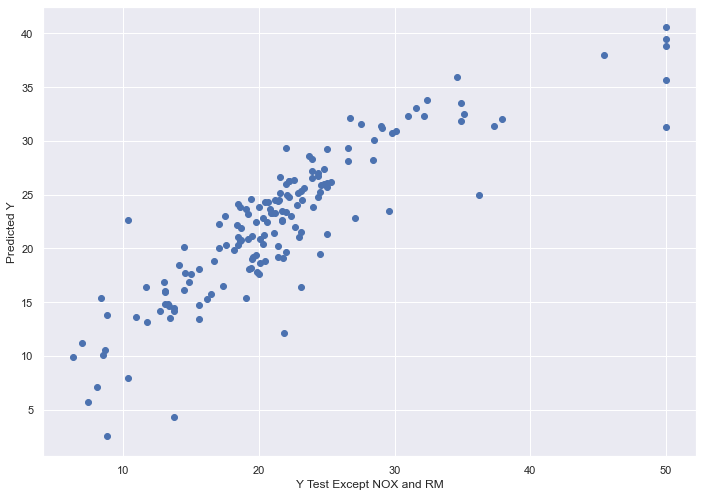

In [244]:
plt.scatter(y_test2, predictions2)
plt.xlabel('Y Test Except NOX and RM')
plt.ylabel('Predicted Y')

In [245]:
print('MAE :', metrics.mean_absolute_error(y_test2, predictions2))
print('MSE :', metrics.mean_squared_error(y_test2, predictions2))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test2, predictions2)))

MAE : 3.0998732789508328
MSE : 17.3735103054011
RMSE : 4.168154304413537


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

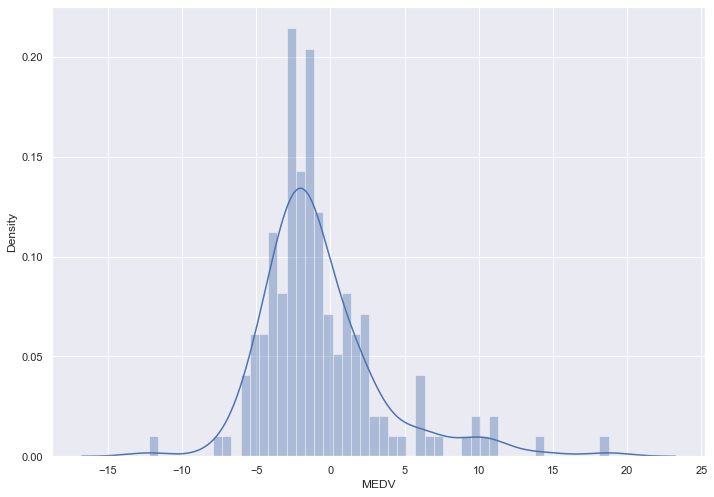

In [246]:
sns.distplot((y_test2-predictions2), bins=50)

<AxesSubplot:>

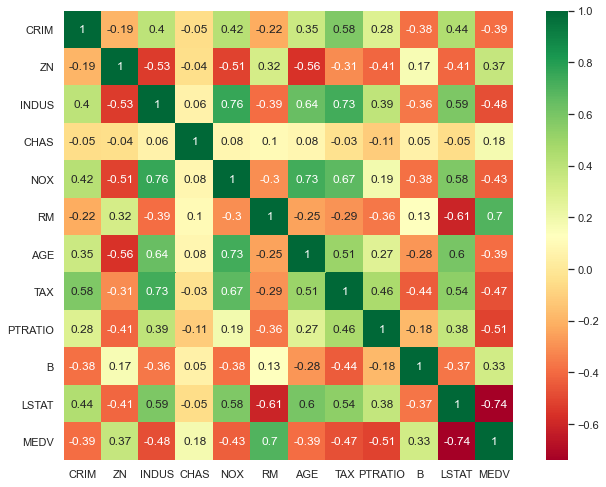

In [247]:
# 점검
data1 = dataset.drop(['RAD', 'DIS'], axis=1, inplace=False)
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.heatmap(data1.corr().round(2), square=True, cmap='RdYlGn', annot=True)

========================================================================================================

### RM, RAD과 DIS 삭제 후 결과 보기
### RM의 경우 LSTAT와 상관관계가 높다. 그러나 LSTAT 보다 MEDV와 상관관계가 적어서 삭제

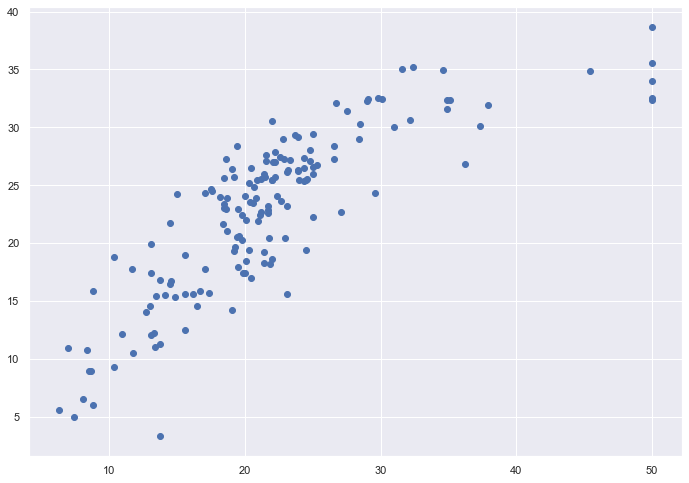

In [248]:
x3 = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y3 = data['MEDV']

x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.4, random_state=10)

model3 = LinearRegression()
model3.fit(x_train3, y_train3)
predictions3 = model3.predict(x_test3)

plt.scatter(y_test3, predictions3)

In [249]:
print('MAE :', metrics.mean_absolute_error(y_test3, predictions3))
print('MSE :', metrics.mean_squared_error(y_test3, predictions3))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test3, predictions3)))

MAE : 3.735190904255408
MSE : 23.939368838717638
RMSE : 4.8927874303629455


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

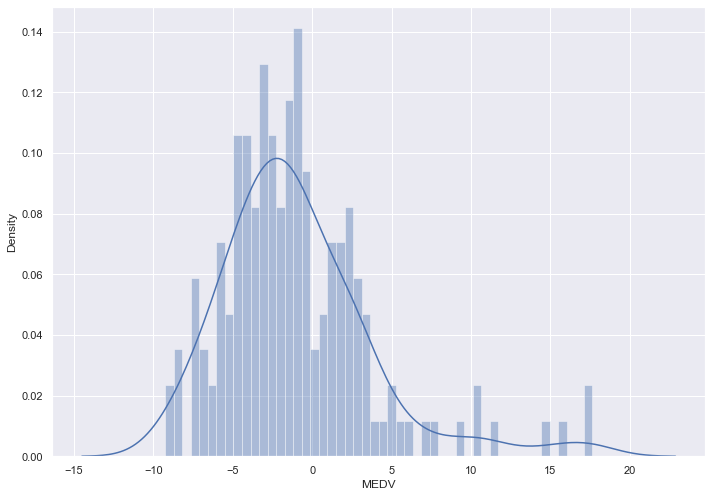

In [250]:
sns.distplot((y_test3 - predictions3), bins=50)

<AxesSubplot:>

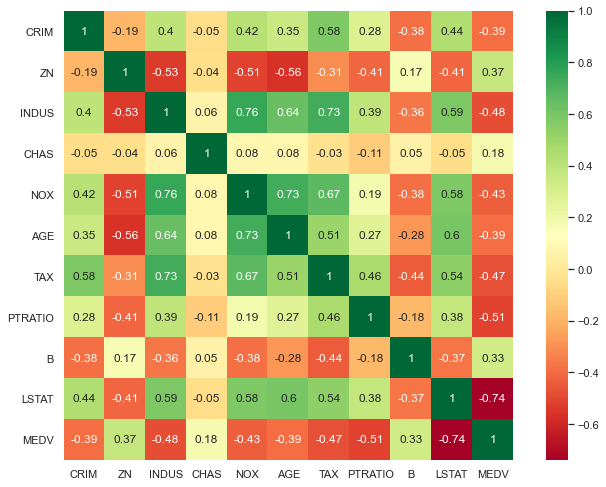

In [251]:
# 점검
data2 = dataset.drop(['RAD', 'DIS', 'RM'], axis=1, inplace=False)
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.heatmap(data2.corr().round(2), square=True, cmap='RdYlGn', annot=True)

========================================================================================================

### ZN, RM, RAD과 DIS 삭제 후 결과 보기
### ZN의 경우 INDUS, NOX, AGE와 상관관계가 높다. 그러나 MEDV와 상관관계가 적어서 삭제

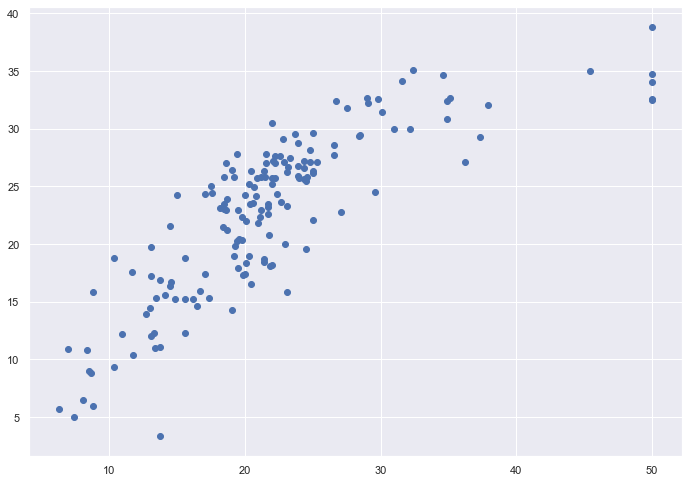

In [252]:
x4 = data[['CRIM', 'INDUS', 'CHAS', 'NOX', 'AGE', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y4 = data['MEDV']

x_train4, x_test4, y_train4, y_test4 = train_test_split(x4, y4, test_size=0.4, random_state=10)

model4 = LinearRegression()

model4.fit(x_train4, y_train4)
predictions4 = model4.predict(x_test4)

plt.scatter(y_test4, predictions4)

In [253]:
print('MAE :', metrics.mean_absolute_error(y_test4, predictions4))
print('MSE :', metrics.mean_squared_error(y_test4, predictions4))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test4, predictions4)))

MAE : 3.7765722382960956
MSE : 24.163283041734974
RMSE : 4.9156162423174345


========================================================================================================

### ZN, RM, RAD과 DIS 삭제 후 결과 보기
### ZN의 경우 INDUS, NOX, AGE와 상관관계가 높다. 그러나 MEDV와 상관관계가 적어서 삭제

========================================================================================================

### 비교해보기

In [256]:
print('===============================전부 다======================================')
print('MAE :', metrics.mean_absolute_error(y_test, predictions))
print('MSE :', metrics.mean_squared_error(y_test, predictions))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('=============================================================================')
print('===============================RAD 삭제======================================')
print('MAE :', metrics.mean_absolute_error(y_test1, predictions1))
print('MSE :', metrics.mean_squared_error(y_test1, predictions1))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test1, predictions1)))
print('=============================================================================')
print('============================RAD와 DIS 삭제====================================')
print('MAE :', metrics.mean_absolute_error(y_test2, predictions2))
print('MSE :', metrics.mean_squared_error(y_test2, predictions2))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test2, predictions2)))
print('=============================================================================')
print('=========================RM, RAD와 DIS 삭제=================================')
print('MAE :', metrics.mean_absolute_error(y_test3, predictions3))
print('MSE :', metrics.mean_squared_error(y_test3, predictions3))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test3, predictions3)))
print('=============================================================================')
print('=========================ZN, RM, RAD와 삭제============================')
print('MAE :', metrics.mean_absolute_error(y_test4, predictions4))
print('MSE :', metrics.mean_squared_error(y_test4, predictions4))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test4, predictions4)))
print('=============================================================================')

===============================전부 다======================================
MAE : 3.032162909929041
MSE : 15.652082884748348
RMSE : 3.956271336087598
===============================RAD 삭제======================================
MAE : 3.0341408161768744
MSE : 16.479915118150583
RMSE : 4.059546171451999
============================RAD와 DIS 삭제====================================
MAE : 3.0998732789508328
MSE : 17.3735103054011
RMSE : 4.168154304413537
=========================RM, RAD와 DIS 삭제=================================
MAE : 3.735190904255408
MSE : 23.939368838717638
RMSE : 4.8927874303629455
=========================ZN, RM, RAD와 삭제============================
MAE : 3.7765722382960956
MSE : 24.163283041734974
RMSE : 4.9156162423174345


### RM 삭제 이후로 증가하였다.
### RM 대신 ZN만 삭제할 경우는?

In [262]:
x3 = data[['CRIM', 'RM', 'INDUS', 'CHAS', 'NOX', 'AGE', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y3 = data['MEDV']

x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.4, random_state=10)

model3 = LinearRegression()
model3.fit(x_train3, y_train3)
predictions3 = model3.predict(x_test3)

# plt.scatter(y_test3, predictions3)

print('MAE :', metrics.mean_absolute_error(y_test3, predictions3))
print('MSE :', metrics.mean_squared_error(y_test3, predictions3))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test3, predictions3)))

MAE : 3.1002554955121586
MSE : 17.376423318963187
RMSE : 4.168503726634197


In [263]:
print('===============================전부 다======================================')
print('MAE :', metrics.mean_absolute_error(y_test, predictions))
print('MSE :', metrics.mean_squared_error(y_test, predictions))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('=============================================================================')
print('===============================RAD 삭제======================================')
print('MAE :', metrics.mean_absolute_error(y_test1, predictions1))
print('MSE :', metrics.mean_squared_error(y_test1, predictions1))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test1, predictions1)))
print('=============================================================================')
print('============================RAD와 DIS 삭제====================================')
print('MAE :', metrics.mean_absolute_error(y_test2, predictions2))
print('MSE :', metrics.mean_squared_error(y_test2, predictions2))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test2, predictions2)))
print('=============================================================================')
print('=========================ZN, RAD와 DIS 삭제=================================')
print('MAE :', metrics.mean_absolute_error(y_test3, predictions3))
print('MSE :', metrics.mean_squared_error(y_test3, predictions3))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test3, predictions3)))
print('=============================================================================')

===============================전부 다======================================
MAE : 3.032162909929041
MSE : 15.652082884748348
RMSE : 3.956271336087598
===============================RAD 삭제======================================
MAE : 3.0341408161768744
MSE : 16.479915118150583
RMSE : 4.059546171451999
============================RAD와 DIS 삭제====================================
MAE : 3.0998732789508328
MSE : 17.3735103054011
RMSE : 4.168154304413537
=========================ZN, RAD와 DIS 삭제=================================
MAE : 3.1002554955121586
MSE : 17.376423318963187
RMSE : 4.168503726634197


### 큰 변화 폭은 없다. 하지만 LSTAT를 했을 때는 상승하였다.
### 상관관계 표를 보고 3-5개 정도 더 지워 보자.

<AxesSubplot:>

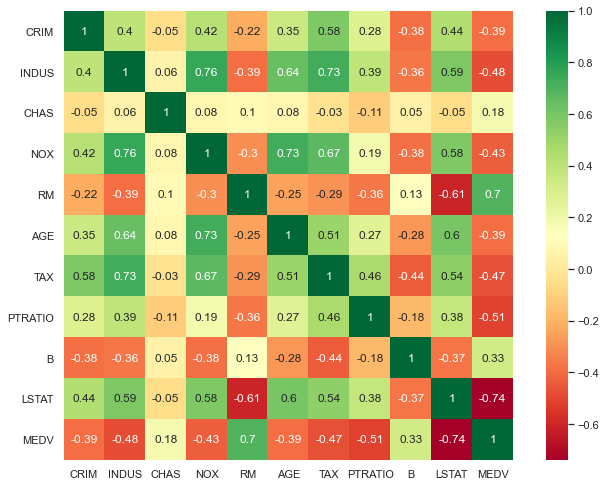

In [264]:
# 점검
data3 = dataset.drop(['RAD', 'DIS', 'ZN'], axis=1, inplace=False)
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.heatmap(data3.corr().round(2), square=True, cmap='RdYlGn', annot=True)

###  MEDV와 상관관계가 가장 적은 CHAS, B 삭제

In [279]:
x5 = data[['CRIM', 'RM', 'INDUS', 'NOX', 'AGE', 'TAX', 'PTRATIO', 'LSTAT']]
y5 = data['MEDV']

x_train5, x_test5, y_train5, y_test5 = train_test_split(x5, y5, test_size=0.4, random_state=10)

model5 = LinearRegression()
model5.fit(x_train5, y_train5)
predictions5 = model5.predict(x_test5)

# plt.scatter(y_test5, predictions5)

print('MAE :', metrics.mean_absolute_error(y_test5, predictions5))
print('MSE :', metrics.mean_squared_error(y_test5, predictions5))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test5, predictions5)))

# sns.distplot((y_test5 - predictions5), bins=50)

MAE : 3.3033399708924374
MSE : 19.484796432240035
RMSE : 4.414158632428159


<AxesSubplot:>

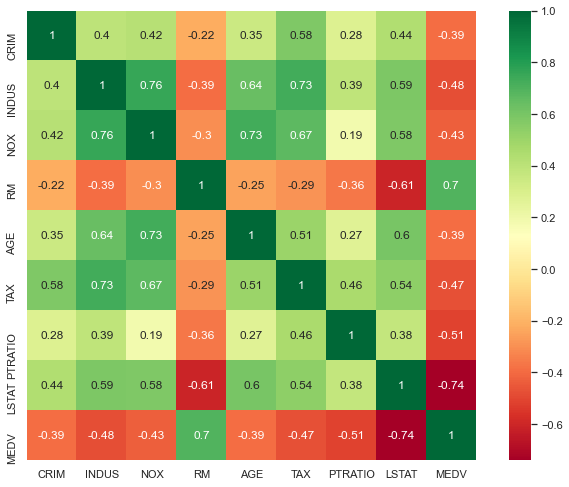

In [280]:
# 점검
data4 = data3.drop(['CHAS', 'B'], axis=1, inplace=False)
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.heatmap(data4.corr().round(2), square=True, cmap='RdYlGn', annot=True)

### 남은 것 중 MEDV와 가장 가까운 RM과 LSTAT만 남겨두자.

In [281]:
x6 = data[['RM', 'LSTAT']]
y6 = data['MEDV']

x_train6, x_test6, y_train6, y_test6 = train_test_split(x6, y6, test_size=0.4, random_state=10)

model6 = LinearRegression()
model6.fit(x_train6, y_train6)
predictions6 = model6.predict(x_test6)

# plt.scatter(y_test6, predictions6)

print('MAE :', metrics.mean_absolute_error(y_test6, predictions6))
print('MSE :', metrics.mean_squared_error(y_test6, predictions6))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test6, predictions6)))

# sns.distplot((y_test6 - predictions6), bins=50)

MAE : 3.783530342632665
MSE : 24.104449276237425
RMSE : 4.909628221794134


### MEDV와 abs값이 가장 큰 2개라면 어떻게 될까

In [287]:
x7 = data[['ZN', 'LSTAT']]
y7 = data['MEDV']

x_train7, x_test7, y_train7, y_test7 = train_test_split(x7, y7, test_size=0.4, random_state=10)

model7 = LinearRegression()
model7.fit(x_train7, y_train7)
predictions7 = model7.predict(x_test7)

# plt.scatter(y_test7, predictions7)

print('MAE :', metrics.mean_absolute_error(y_test7, predictions7))
print('MSE :', metrics.mean_squared_error(y_test7, predictions7))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test7, predictions7)))
# sns.distplot((y_test7 - predictions7), bins=50)

MAE : 4.384153901609323
MSE : 32.905075178788174
RMSE : 5.7362945512576475


### 가장 강하다고는 했지만 서로 양극화된 상관관계이다. 음의 상관관계중에서 2개를 고르면 어떻게 될까.

MAE : 3.6459278488478235
MSE : 24.977692662716418
RMSE : 4.997768768432211


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

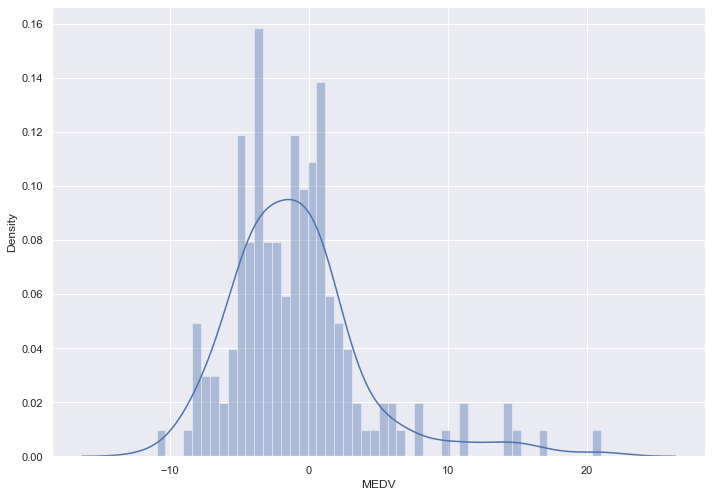

In [285]:
x8 = data[['PTRATIO', 'LSTAT']]
y8 = data['MEDV']

x_train8, x_test8, y_train8, y_test8 = train_test_split(x8, y8, test_size=0.4, random_state=10)

model8 = LinearRegression()
model8.fit(x_train8, y_train8)
predictions8 = model8.predict(x_test8)

# plt.scatter(y_test8, predictions8)

print('MAE :', metrics.mean_absolute_error(y_test8, predictions8))
print('MSE :', metrics.mean_squared_error(y_test8, predictions8))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test8, predictions8)))
sns.distplot((y_test8 - predictions8), bins=50)

In [293]:
a = x_test8[3:4]

In [294]:
print(model8.predict(a))

[11.95831749]
